In [1]:
import sys
import importlib
import os
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py'>

In [3]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder

processor = PatientDataProcessor(base_path=data_path)
meta_data = processor.load_all_clinical_data(labels=["WOMKP"])

In [4]:
meta_data

,V00AGE,V00WOMKPL,V00WOMKPR,Sex,V01AGE,V01WOMKPL,V01WOMKPR,Sex,V02AGE,V02WOMKPL,...,V09WOMKPR,Sex,V10AGE,V10WOMKPL,V10WOMKPR,Sex,V11AGE,V11WOMKPL,V11WOMKPR,Sex
ID,,,,,,,,,,,,,,,,,,,,,
9000099,59,0.0,1.0,0,60.0,0.0,0.0,0,NaN,NaN,...,0.0,0,66.0,4.0,3.0,0,67.0,4.0,2.0,0
9000296,69,0.0,0.0,0,70.0,0.0,0.0,0,NaN,NaN,...,0.0,0,77.0,0.0,0.0,0,78.0,0.0,0.0,0
9000622,71,0.0,3.0,1,72.0,0.0,2.0,1,NaN,NaN,...,,1,NaN,NaN,NaN,1,NaN,NaN,NaN,1
9000798,56,8.0,0.0,0,58.0,8.0,0.0,0,58.0,7.0,...,0.0,0,64.0,5.0,0.0,0,65.0,3.0,0.0,0
9001104,72,0.0,4.0,1,73.0,0.0,1.0,1,NaN,NaN,...,,1,80.0,0.0,1.0,1,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999365,56,4.0,5.0,0,57.0,3.0,5.0,0,NaN,NaN,...,1.0,0,64.0,4.0,2.0,0,65.0,5.0,6.0,0
9999510,50,3.0,0.0,0,51.0,1.0,0.0,0,NaN,NaN,...,1.0,0,58.0,3.0,0.0,0,59.0,4.0,0.0,0
9999862,61,0.0,0.0,1,62.0,0.0,0.0,1,NaN,NaN,...,0.0,1,69.0,0.0,0.0,1,70.0,0.0,0.0,1


In [4]:
from src.dataLoaders.utils.BalancedDataLoader import BalancedBatchSampler
importlib.reload(sys.modules['src.dataLoaders.utils.BalancedDataLoader'])

from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

from src.transformers.SliceTransformer import SliceAggregateTransform
importlib.reload(sys.modules['src.transformers.SliceTransformer'])
custom_transforms = [SliceAggregateTransform(keys=["image"], slices_from_each_view=9)]

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <E03EDA44-89AE-3115-9796-62BA9E0E2EDE> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <D2077E4D-18BC-34B9-8A9B-1EF634A0F416> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstD, ScaleIntensityd, ToTensord, ResizeD, Lambdad, NormalizeIntensityD

transforms = [
            LoadImaged(keys=["image"], ensure_channel_first=True),
            ResizeD(keys=["image"], spatial_size=(128, 128, 54)),
            ScaleIntensityd(keys=["image"]),
            ToTensord(keys=["image"]),
            # NormalizeIntensityD(keys=["image"], nonzero=True, channel_wise=True),
            # ToTensord(keys=["image"]),
        ]


In [6]:
dataset = 'niftiShort'
data_path = '../datasets/nifti/'
data_dir = f'{data_path}{dataset}'

# data_dir = 'C:/Users/askel/Downloads/NIFTY/NIFTY/'
# max = 8876
dim = 384
data_loader = NiftiDataLoader(data_dir=data_dir, 
                              meta_data_loader=processor,
                              batch_size=4,
                              cache_rate=0.2, 
                              replace_rate=0.2,
                              transforms=transforms,
                              custom_sampler=False
                              )
# data_loader.load_data(visit_no=visit, subset_size=2058, cache="standard")
# data_loader.load_data(subset_size=84, cache="standard")
#data_loader.load_data(subset_size=4400, cache="standard")
# data_loader.load_data(subset_size=8875, cache="standard")
# data_loader.load_data(cache="persistent")
data_loader.load_data(cache="standard")

File /Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/saved_data_lists/data_list.pkl does not exist.
Data list loaded: False
Using custom sampler: False
File /Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/saved_data_lists/data_list.pkl does not exist.
Visits: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Total images detected: 83
Subset size: 83


Loading dataset: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

batch_size: 4


In [13]:
from src.models.medical_models.monai_resnet import MonaiMedicalResNet
importlib.reload(sys.modules['src.models.medical_models.monai_resnet'])
importlib.reload(sys.modules['src.models.medical_models.base_medical'])

<module 'src.models.medical_models.base_medical' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/base_medical.py'>

In [9]:
len(data_loader.train_loader.dataset[0]['label'])

1

In [14]:
# Create a model instance
model = MonaiMedicalResNet(
    num_epochs=150,
    learning_rate=0.001,
    weight_decay=1e-4,
    data_loader=data_loader,
    dropout_rate=0.1,
    depth=18,
    pretrained=True
)

model.load_model('MonaiMedicalResNet_18_1419_height_torch.Size([4, 1, 128, 128, 54])_epoch_30_val_8.15_r2_8.15.pth')
# model.train()
model.evaluate(loader=data_loader.train_loader)

Data loader train loader:  17 65
Image spatial dimensions:  torch.Size([4, 1, 128, 128, 54])
Number of input channels:  1
Spatial dims:  3
State dict key adjustment dict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias',

In [ ]:
# evaluate with the best model
# model.load_model('MedicalResNetModel_18_487_height_384_epoch_34_val_0.13.pth')
# model.evaluate()

In [85]:
from src.XAI.VanillaSaliencyMedica3D import VanillaSaliency3D
importlib.reload(sys.modules['src.XAI.VanillaSaliencyMedica3D'])

<module 'src.XAI.VanillaSaliencyMedica3D' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/XAI/VanillaSaliencyMedica3D.py'>

{'WOMKP': 0.0}
saliencies.shape (128, 128, 54)
original_images.shape (128, 128, 54)


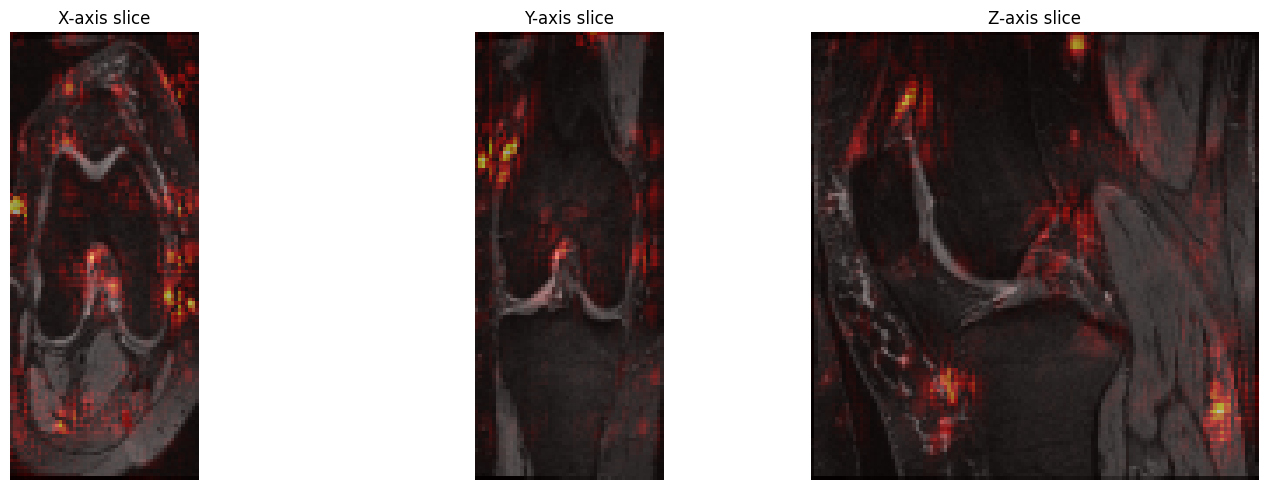

In [86]:
saliency = VanillaSaliency3D(modelWrapper=model)
saliency.generate_map(index=0)

# for i in range(0, 1):
#     saliency.generate_map(index=i) 